In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import csv

In [22]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
x = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
y['Diagnosis'] = y['Diagnosis'].replace({'M': 1, 'B': 0})

# retrieved from https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_34548\958500221.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y['Diagnosis'] = y['Diagnosis'].replace({'M': 1, 'B': 0})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_34548\958500221.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Diagnosis'] = y['Diagnosis'].replace({'M': 1, 'B': 0})


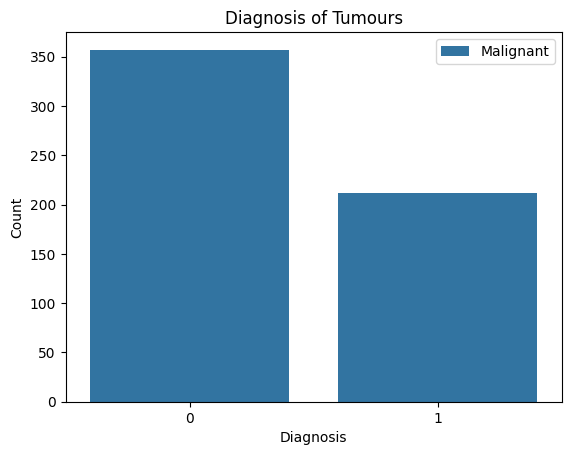

In [23]:
custom_palette = {'M': 'green', 'B': 'blue'}

sns.countplot(x='Diagnosis', data=y)

plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Diagnosis of Tumours')

plt.legend(labels=['Malignant', 'Benign'])

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)
print(x)

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [44]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import plot_model

# Define the model
model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Visualize the model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [45]:
print(model.summary())

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [46]:
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=50,
                    validation_data=(X_test, y_test))

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6506 - loss: 0.6729 - val_accuracy: 0.6014 - val_loss: 0.6797
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6609 - loss: 0.6564 - val_accuracy: 0.6014 - val_loss: 0.6652
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6215 - loss: 0.6630 - val_accuracy: 0.6084 - val_loss: 0.6523
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6716 - loss: 0.6391 - val_accuracy: 0.6713 - val_loss: 0.6410
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7127 - loss: 0.6315 - val_accuracy: 0.7622 - val_loss: 0.6310
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7440 - loss: 0.6239 - val_accuracy: 0.7762 - val_loss: 0.6221
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7870 - loss: 0.6103 - val_accuracy: 0.7762 - val_loss: 0.6139
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7651 - loss: 0.6009 - val_accuracy: 0.7832 - val_loss: 0.6058

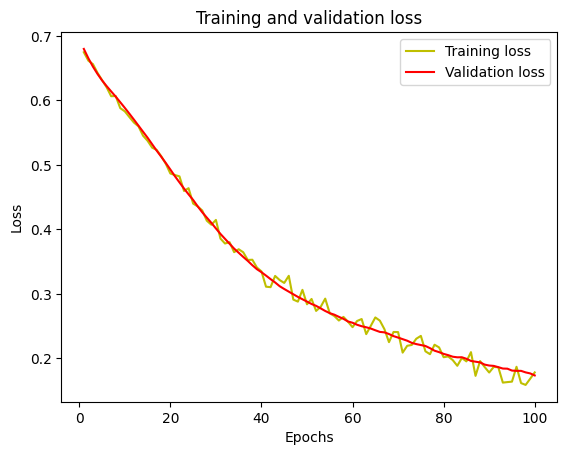

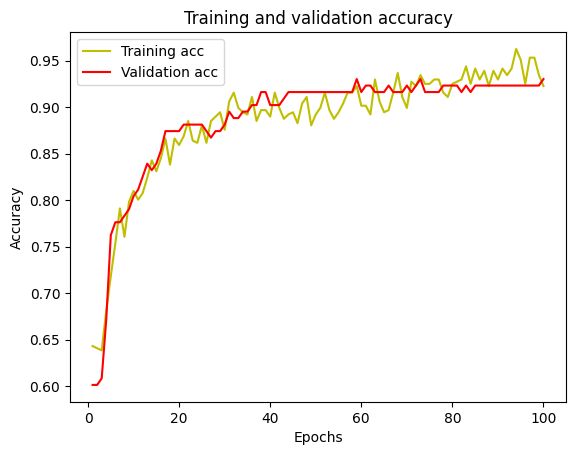

In [47]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import confusion_matrix

y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

# Extract true positives, false positives, false negatives, and true negatives from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Print the values
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
True Negatives: 83
False Positives: 3
False Negatives: 7
True Positives: 50


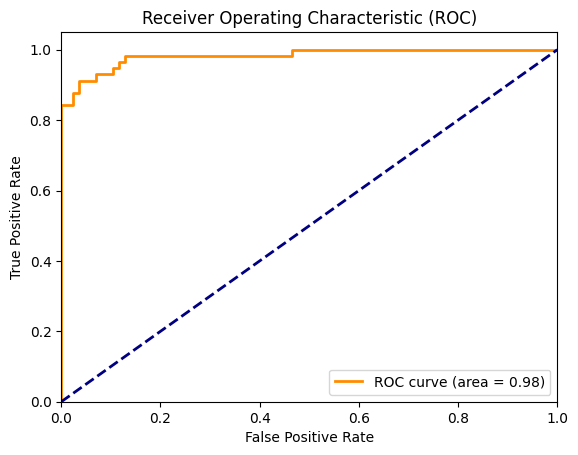

In [52]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming your model is already trained and you have predicted probabilities for the positive class (class 1)
# Replace y_pred_proba with your predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()